# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data Access

In [3]:
raw_data=pd.read_csv('KNN_Data.csv')
raw_data.head(3)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0


# Data Analysis

In [5]:
df=raw_data
df.head(5)

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Age        330 non-null    int64
 1   Salary     330 non-null    int64
 2   Purchased  330 non-null    int64
dtypes: int64(3)
memory usage: 7.9 KB


In [9]:
df.isnull().values.any()

False

There is no NaN values in the dataset

# Univariable analysis
We analyze the columns individually, starting with **Purchased**.

In [14]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

so we have only 0 and 1 values for the Purchased column, we can interprete that 0 means False, and 1 means True. So we could anticipate a classification based on the purchased object:
- Based on the Salary and Age of a person, we classify if the person has pourchased an article or not.

We analyze the columns **Age**.

In [17]:
df['Age'].describe()

count    330.000000
mean      39.293939
std       10.447508
min       18.000000
25%       32.000000
50%       39.000000
75%       47.000000
max       60.000000
Name: Age, dtype: float64

The mean age is 39.29 years, the standard deviation is 10.44 which explains the dispersion or spread of the data around the mean.
the minimum age is 18.
25% of the ages are below 32 years old.
50% of the ages are below 39 years old.
75% of the ages are below 47 years old.
the maximum age is 60.

We can make a graphical representation of the data dispersion of age. We can use a boxplot.


Text(0, 0.5, 'Age')

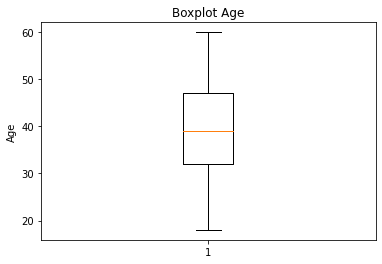

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(df['Age'])
ax.set_title('Boxplot Age')
ax.set_ylabel('Age')

We have a quite balanced dispersion between the ages.

Now we will analyze the Salary column

In [30]:
df['Salary'].describe()

count       330.000000
mean      72409.090909
std       35208.703535
min       15000.000000
25%       43250.000000
50%       71000.000000
75%       90000.000000
max      150000.000000
Name: Salary, dtype: float64

The mean age is 72409.090909, the standard deviation is 35208.703535 which explains the dispersion or spread of the data around the mean.
the minimum salary is 15000,00.
25% of the salary are below 43250,00.
50% of the salary are below 71000,00.
75% of the salary are below 90000,00.
the maximum salary is 150000,00.

Text(0, 0.5, 'Salary')

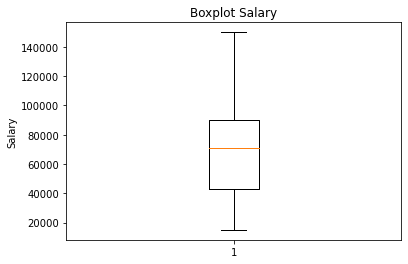

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(df['Salary'])
ax.set_title('Boxplot Salary')
ax.set_ylabel('Salary')

Just like the Age we have a good dispersion between the salary data.

## Bivarial analysis

We will make 3 types of analysis 2 variable analysis:
- Age and Salary
- Age and Purchased
- Salary and Purchased

# KNN CLASSIFICATION

We analyze the data based on the 2 columns age and Salary. The groups we will analyze are Purchased and not purchased, as such 2 groups. We will then make a prédiction on if the person purchased an article or not.

Text(0, 0.5, 'Salary')

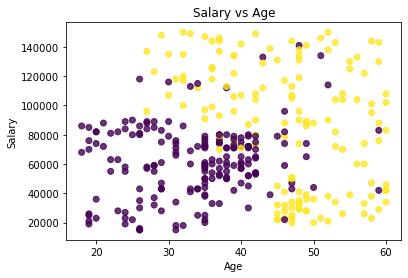

In [44]:
#we make a scatter plot for the age and salary and seperate them by purchased.
plt.scatter(df['Age'],df['Salary'],c=df['Purchased'],alpha=0.8)
plt.title('Salary vs Age')
plt.xlabel('Age')
plt.ylabel('Salary')

In [57]:
X=df[['Age','Salary']].to_numpy()
y=df['Purchased'].to_numpy()

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=5 #ce qui permet de fixer le mélange du dataset
                                                   )
print('Train set:'+ str(X_train.shape))
print('Test set:'+ str(X_test.shape))

Train set:(264, 2)
Test set:(66, 2)


Text(0.5, 1.0, 'Test set')

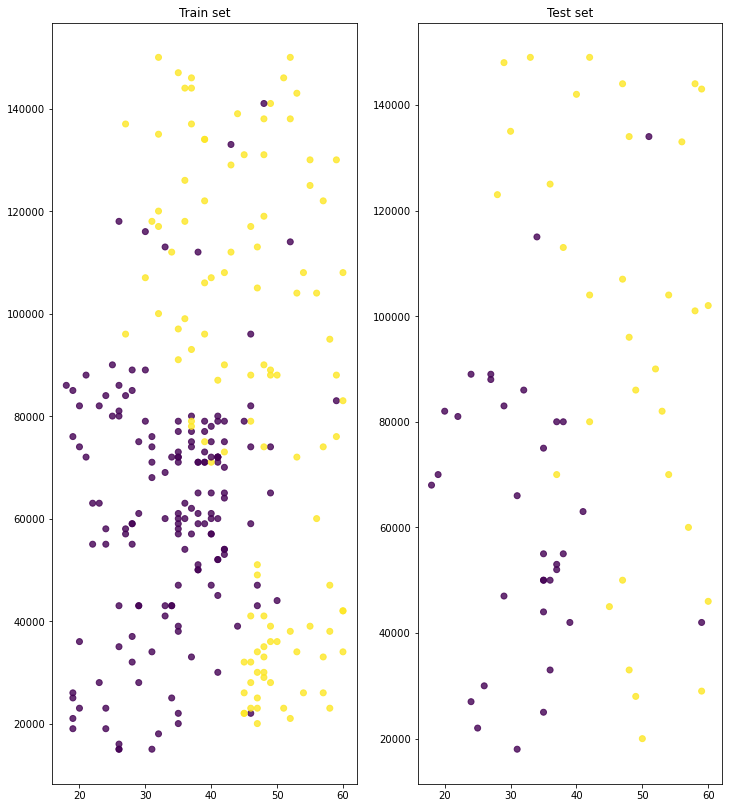

In [62]:
#maintenant on veut afficher 
plt.figure(figsize=(12,14))
plt.subplot(121)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,
            alpha=0.8 #la où il y a le plus de points, c'est plus profond la couleur (transparence.)
           )
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,
            alpha=0.8 #la où il y a le plus de points, c'est plus profond la couleur (transparence.)
           )
plt.title('Test set')

In [63]:
from sklearn.neighbors import KNeighborsClassifier
model= KNeighborsClassifier(n_neighbors=2)
model.fit(X_train,y_train)
print('train_score',model.score(X_train,y_train)) #ca va donner 1 car il c'est entrainé dessus.
print('train_test',model.score(X_test,y_test))

train_score 0.8977272727272727
train_test 0.7424242424242424


In [64]:
#il va falloire optimiser les hyperparametre: le nombre de voisins et la distance qu'on veut (euclidienne ou manhattan)
from sklearn.model_selection import cross_val_score

In [65]:
model= KNeighborsClassifier()
cross_val_score(model,X_train,y_train,cv=5,scoring='accuracy')

array([0.83018868, 0.77358491, 0.79245283, 0.79245283, 0.71153846])

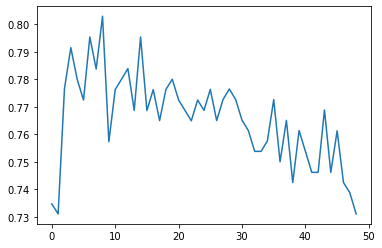

In [66]:
val_score=[]
for k in range(1,50):
    score=cross_val_score(KNeighborsClassifier(k),X_train,y_train,cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

C:\Users\MIKED\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


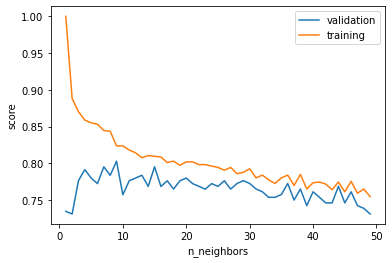

In [67]:
#meme pas besoin de faire la case précédente, il suffit qu'on utilise la méthode validation_curve

from sklearn.model_selection import validation_curve
model= KNeighborsClassifier()
k=np.arange(1,50)
train_score,val_score= validation_curve(model,X_train,y_train,'n_neighbors',k,cv=5)
plt.plot(k,val_score.mean(axis=1),label='validation')
plt.plot(k,train_score.mean(axis=1),label='training')
plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

In [68]:
#on peut utilise la gridsearchCV
from sklearn.model_selection import GridSearchCV


In [69]:
#on définit les hyperparametres les neigbour et la methode de distance qu'on utilise.
param_grid={'n_neighbors':np.arange(1,20),'metric':['euclidean','manhattan']}

grid= GridSearchCV(KNeighborsClassifier(),param_grid,cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [74]:
#donc le meilleure neighbour est 9, et la meilleure distance est euclidean.
print(grid.best_score_)
print(grid.best_params_)

0.8029027576197387
{'metric': 'euclidean', 'n_neighbors': 9}


In [75]:
model= grid.best_estimator_
model.score(X_test,y_test)

0.7272727272727273

In [76]:
#on créer la matrice de confusion
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))


array([[24,  9],
       [ 9, 24]], dtype=int64)

[ 21  42  63  84 105 126 147 168 189 211]


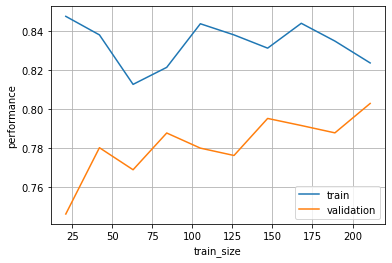

In [77]:
#maintenant la seule chose a faire ce que on pourrais faire pour l'améliorer.
from sklearn.model_selection import learning_curve
N, train_score, val_score=learning_curve(model,X_train,y_train,train_sizes=np.linspace(0.1,1,10),cv=5)
print(N)
plt.plot(N,train_score.mean(axis=1),label="train")
plt.plot(N,val_score.mean(axis=1),label="validation")
plt.xlabel('train_size')
plt.ylabel('performance')
plt.legend()
plt.grid()
plt.show()